### Imports

In [4]:
!pip install scikit-learn
!pip install nltk
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 461.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.9 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/10.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.9 MB 4.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/10.9 MB 5.5 MB/s eta 0:00:02
   --

In [5]:
import numpy as np
import pandas as pd
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from collections import Counter

from wordcloud import WordCloud


#Training Models:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [22]:
df= pd.read_csv("pre-processed.csv", encoding='cp1252')

In [10]:
df.head(10)

,text,label
0,serious perspective obviously present outset s...,0
1,technically possible view game read right remo...,0
2,file czechwikipedia png listed deletion file u...,0
3,awizardsbeard freebsdgirl people make messed s...,0
4,peerworker online harassment serious problem n...,0
5,people want article sucks alot melungeon page ...,0
6,take liberty calling fag second time sir,0
7,opinions perfect right nothing first reeks aca...,0
8,like combination reason think opt specific pag...,0
9,umarfarooq faheemhus jackmjenkins example moha...,1


In [35]:
df = df.dropna(subset=['text'])
df.sample(5)

,text,label
391873,sorrry hear wrote articles maybe nexxt time,0
185125,note case noticed yet may want nowiki ref tag ...,0
97515,jews get special term discrimination black peo...,1
437784,keepin poop jar till day come back idon forget...,1
343620,well disambiguation pages going redirects reas...,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448469 entries, 0 to 448872
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    448469 non-null  object
 1   label   448469 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.3+ MB


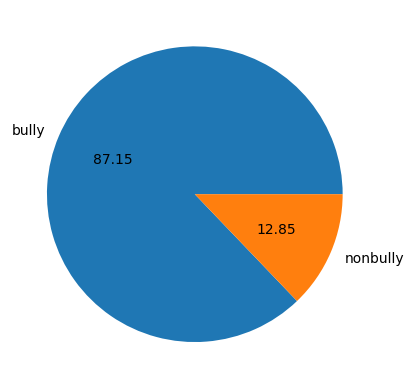

In [38]:
plt.pie(df['label'].value_counts(),labels=['bully','nonbully'],autopct = '%0.2f')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448469 entries, 0 to 448872
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    448469 non-null  object
 1   label   448469 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.3+ MB


In [40]:
df['num_characters']=df['text'].apply(len)
df.head(5)

,text,label,num_characters
0,serious perspective obviously present outset s...,0,82
1,technically possible view game read right remo...,0,214
2,file czechwikipedia png listed deletion file u...,0,202
3,awizardsbeard freebsdgirl people make messed s...,0,101
4,peerworker online harassment serious problem n...,0,100


In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
from nltk.tokenize import word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

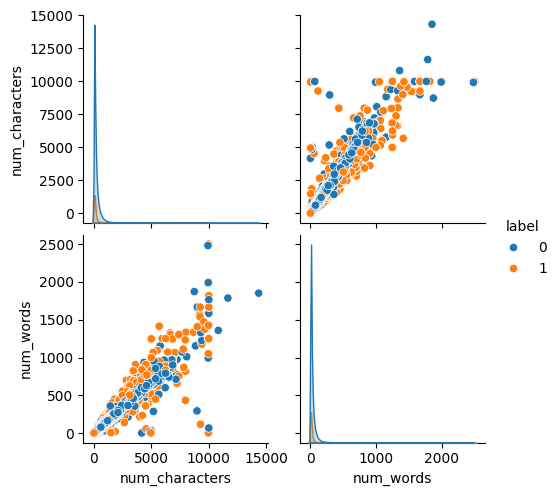

In [47]:
sns.pairplot(df,hue='label')

### Preprocessing

In [59]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
def transform_text(text):
    text=text.lower() # converting to lower case
    text = nltk.word_tokenize(text) # tokenizing
    text = [word for word in text if word.isalnum()] # removing special characters only. ( isalpha() will be true for word in text containing alphabets and numbers only.)
    # removing stopwords and punctuations
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [PorterStemmer().stem(word) for word in text] # stemming
    # returning the text as a string
    return ' '.join(text)

In [61]:
df['transformed_text']=df['text'].apply(transform_text)

RecursionError: maximum recursion depth exceeded

In [ ]:
df.sample(5)

In [ ]:
bully_wc= WordCloud(width=600,height=400,background_color='white',max_words=100).generate(" ".join(df[df['label']==0]['transformed_text']))
# plt.figure(figsize=(12,8))
plt.imshow(bully_wc)

In [ ]:
non_bully= WordCloud(width=600,height=400,background_color='white',max_words=100).generate(" ".join(df[df['label']==1]['transformed_text']))
# plt.figure(figsize=(12,8))
plt.imshow(non_bully)

In [ ]:
# converting them into a list
# getting all the spam msgs as a list
bully_list = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        bully_list.append(word)


# getting all the ham msgs as a list
non_bully_list = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        non_bully_list.append(word)


In [ ]:
sns.barplot(x=pd.DataFrame(Counter(bully_list).most_common(30))[0],y=pd.DataFrame(Counter(bully_list).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()


### Building the model

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [ ]:
# spltting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
ypred_mnb = mnb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, ypred_mnb)
precision = precision_score(y_test, ypred_mnb)

### Pickling

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))